# Ultimate data science challenge

In [1]:
import pandas as pd
import numpy as np
from numpy import random
# We will use it to count themes

import datetime as dt
from datetime import datetime, timedelta, date

import json
from pandas.io.json import json_normalize

In [2]:
logins = pd.read_json('logins.json')

In [3]:
with open ('ultimate_data_challenge1.json') as j_file:
    j_data = json.load(j_file)

    
ultimate = pd.DataFrame(j_data)

## Explore data

In [4]:
print(logins[:5])
print(logins[-5:])

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21
               login_time
93137 1970-04-13 18:50:19
93138 1970-04-13 18:43:56
93139 1970-04-13 18:54:02
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23


In [5]:
ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [6]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## Exploration

In [7]:
logins_ord = logins.sort_values('login_time').reset_index()

In [8]:
logins_ord.tail()

,index,login_time
93137,93136,1970-04-13 18:48:52
93138,93137,1970-04-13 18:50:19
93139,93139,1970-04-13 18:54:02
93140,93141,1970-04-13 18:54:23
93141,93140,1970-04-13 18:57:38


### Data

The time stamps time interval is from January 1, 1970 to April 13, 1970. Starting time was 20:12 and end time was 19:57. 

For this exercise, we start the measuring at 20:00 of the first day, and end at 19:00 on the last day.

We used logins_ord as ordered data series of the original data.

In [9]:
# constants I use to transform data
delta_int = timedelta(minutes=15)
start_time = dt.datetime(1970, 1, 1, 20, 00)
check_time = dt.datetime(1970, 4, 13, 18,30)
end_time = dt.datetime(1970, 4, 13, 18, 45)
print(start_time)
print(delta_int)
print(end_time)


1970-01-01 20:00:00
0:15:00
1970-04-13 18:45:00


In [10]:
# calculate count logins every 15 min intervals.
count_logins = []
times = []
hour_set = []
row = 0

tm = start_time
time_up = tm
while  tm <=end_time :
    time_up += delta_int
    counter_logins = 0
    while logins_ord.iloc[row]['login_time'] < tm + delta_int and (
        row < 93141):
        counter_logins += 1
        row += 1
    times.append(tm)
    count_logins.append(counter_logins)
    hour = tm.time().strftime('%H:%M:%S')
    hour_set.append(tm.time().strftime('%H:%M:%S'))
    tm += delta_int

#print(count_logins)
print(start_time)
print(check_time)

1970-01-01 20:00:00
1970-04-13 18:30:00


In [11]:
print(len(count_logins))
print(len(times))

9788
9788


In [12]:
df_logins = pd.DataFrame([times, count_logins, hour_set]).transpose()
df_logins.columns = ['date_time_stamp','login_count', 'hour_min' ]
df_logins.head()

,date_time_stamp,login_count,hour_min
0,1970-01-01 20:00:00,2,20:00:00
1,1970-01-01 20:15:00,6,20:15:00
2,1970-01-01 20:30:00,9,20:30:00
3,1970-01-01 20:45:00,7,20:45:00
4,1970-01-01 21:00:00,1,21:00:00


In [13]:
by_time = df_logins.groupby('hour_min')['login_count'].sum()

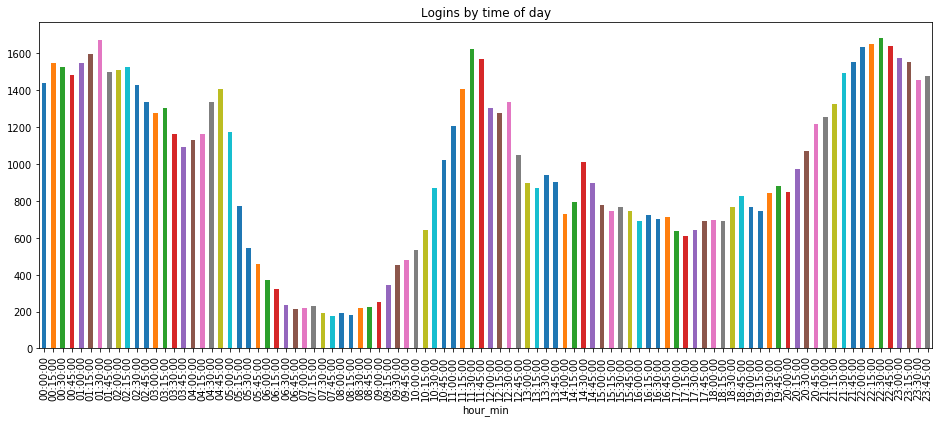

In [51]:
by_time.plot(  kind='bar',   title='Logins by time of day', figsize= (16, 6))


### Logins by time

There is pattern when people log in the system. The time data has periodic nature. most logins (???) occur arount 1:45, 11:30 and 22:45.

It seems to me that the daily pattern starts going up at 17:00 to 22:30, very sligthly toward midnight and then anothe small up to 1;45 and keep high going down to 4:00 am, small pick for 5:00 am and big dip with minimum at 8:00 am. 
During the day, the pattern is login go up to 11:45, and going down to 17:00.

Military time 17:00 is 5:00 pm, 22:30 is 10:30 pm.

In [15]:
# 0 = Sunday
logins_day_week = [x.isoweekday() for x in times]

In [16]:
# extracting the day of week for the survey
weekday_data = pd.DataFrame(logins_day_week)
weekday_data.columns = ['day_of_week']
weekday_data.head()

,day_of_week
0,4
1,4
2,4
3,4
4,4


In [17]:
# merging day of week and the rest of logins.
df_logins = pd.merge(left=df_logins, right=weekday_data, left_index=True, right_index=True)

In [18]:
df_logins.head()

,date_time_stamp,login_count,hour_min,day_of_week
0,1970-01-01 20:00:00,2,20:00:00,4
1,1970-01-01 20:15:00,6,20:15:00,4
2,1970-01-01 20:30:00,9,20:30:00,4
3,1970-01-01 20:45:00,7,20:45:00,4
4,1970-01-01 21:00:00,1,21:00:00,4


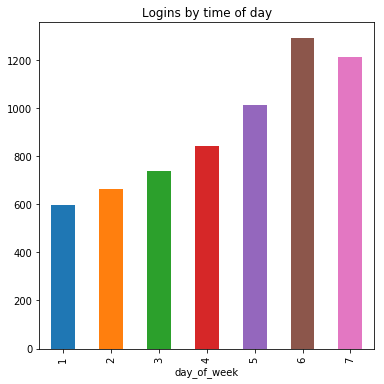

In [19]:
# averaging logins by day of week
df_by_day = (df_logins.groupby('day_of_week')['login_count'].sum())/(
            df_logins.groupby('day_of_week')['login_count'].count())*96
df_by_day.plot( kind='bar',   title='Logins by time of day', figsize= (6, 6))

### Distribution of logins by day

1 on the graph corresponds to Sunday (isoweekday() function). The least number of logins in data is on Sunday. The most is on Friday. The week looks like slight up each weekday from Sunday to Friday, then stip down Saturday and Sunday.

On Sunday the average is about 600 logins and on Friday the average number of logins is about 1300.

##  Experiment    and    metrics    design 

The    neighboring     cities    of    Gotham    and    Metropolis    have     complementary     circadian     rhythms:     on  weekdays,    Ultimate    Gotham     is    most     active    at    night,    and    Ultimate    Metropolis     is    most    active  during     the    day.    On    weekends,     there     is     reasonable    activity     in    both     cities.

However,    a     toll    bridge,     with     a     two  ­way     toll,    between     the     two     cities     causes    driver    partners     to     tend  to    be    exclusive     to    each     city.     The     Ultimate    managers    of     city    operations     for     the     two     cities    have  proposed    an    experiment     to     encourage    driver    partners     to    be    available     in    both     cities,    by  reimbursing    all     toll     costs. 

### Key measure

Two key measures can be introduced to measure the success. First measure will be average number of times the bridge is passed(tolls paid). The second measure is average trip length per day for each driver.

The experiment will measure if reimbursment of tall payment will encourage the partner drivers to operate both cities. 
Null hypothesis will be the reimburcement will not change the drivers behavior. One, the number of passing the bridge will be the same, Two, the length of trips will be the same.

We need to assign probability under which we will reject the null hypothesis. We can use 5% or 1% (95% CI) or (99% CI). We can use 95% CI.

### Implementation

a) We will divide the drivers in two groups - A and B. All partner drivers will be assigned a group at random. Group A will have reimburcement for the first half of month, and group B - second. We need to collect for this month the length of each trip and if the bridge was passed on each trip. 

The experiment need to be done for 1 month. The data collected will help to eleviate the daily and weekly fluctuations.

We will perform statistical calculation for the probability that the reimburcement does not change the number of trips over the bridge 



## Predictive modeling

In [20]:
logins.tail(2)

,login_time
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [21]:
ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [22]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### Ultimate Exploration

First, we deal with missing values. I am not concerned about the phone number missing. We will fill only two values - average ratings of driver and by driver. We will use only the mean of each value.

The type of phone cannot be averaged. If we want to use that column for prediction, we need a value for the missing phone. I set for the value 'Other'.

In [23]:
# missing values
average_by_driver = ultimate['avg_rating_by_driver'].mean()
average_of_driver = ultimate['avg_rating_of_driver'].mean()

# fill values with mean of ratings.
ultimate['avg_rating_by_driver'] = ultimate['avg_rating_by_driver'].fillna(average_by_driver)
ultimate['avg_rating_of_driver'] = ultimate['avg_rating_of_driver'].fillna(average_of_driver)
ultimate['phone'] = ultimate['phone'].fillna('Other')

In [24]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [25]:
# ultimate black - not ultimate black
ultimate.groupby('ultimate_black_user')['avg_dist'].count()


ultimate_black_user
False    31146
True     18854
Name: avg_dist, dtype: int64

18,854 users took Ultimate Black in their 30 days, and  31,146 did not.

It is not known when the data was pulled out. 

Assumption: the data was taken on the day when the latest date is in the last_trip column. We will use this to count the 30 days back to see how many users were active.



In [26]:
dates = list(ultimate['last_trip_date']) 

#l_dates = [date.to_datetime() for date in dates]
ultimate['last_date'] = pd.to_datetime(ultimate['last_trip_date'])


In [27]:
# change date to integer in year.
last_date = ultimate.last_date.max().date()
is_active = int(last_date.strftime('%j')) 
is_active

182

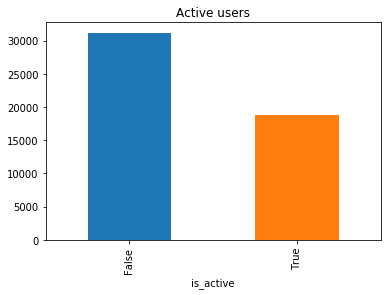

In [28]:
ultimate['is_active'] = [is_active - int(date.strftime('%j')) <= 30 for date in ultimate['last_date']]

ultimate.groupby('is_active')['last_date'].count().plot(kind='bar', title='Active users')

From the 50000 users 26222 took trip in the last 30 days. These are considered active users.

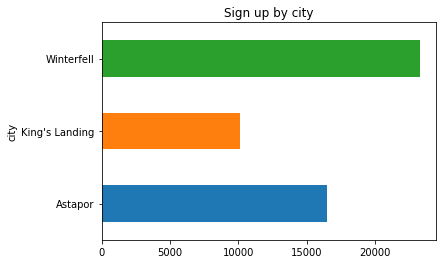

In [29]:
ultimate.groupby('city')['avg_dist'].count().plot(kind='barh', title='Sign up by city')

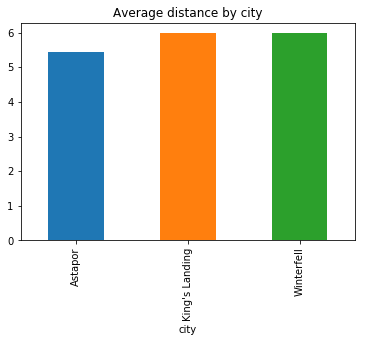

In [30]:
ultimate.groupby('city')['avg_dist'].mean().plot(kind='bar', title='Average distance by city')

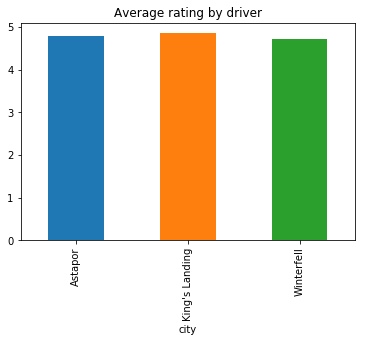

In [31]:
# average ratings
ultimate.groupby('city')['avg_rating_by_driver'].mean().plot(kind='bar', 
                        title='Average rating by driver')

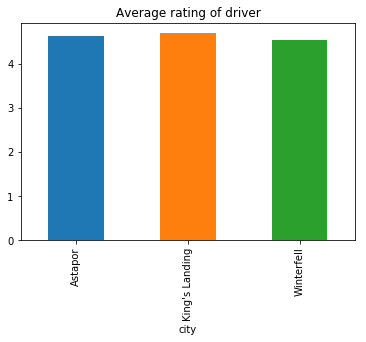

In [32]:
ultimate.groupby('city')['avg_rating_of_driver'].mean().plot(kind='bar', 
                        title='Average rating of driver')

### Preparing data for machine learning

In [33]:
# add column with numeric value for last trip.
ultimate['day_year'] = [int(date.strftime('%j'))  for date in ultimate['last_date']]

In [34]:
# city and phone are categorical variables.
ultimate['city'] = ultimate['city'].astype('category')
ultimate['phone'] = ultimate['phone'].astype('category')

In [35]:
list_columns = ['city', 'phone', 'day_year', 'avg_rating_of_driver',
               'avg_rating_by_driver', 'avg_surge', 'trips_in_first_30_days',
               'ultimate_black_user', 'weekday_pct', 'is_active']

data = pd.DataFrame(ultimate[list_columns])

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
city                      50000 non-null category
phone                     50000 non-null category
day_year                  50000 non-null int64
avg_rating_of_driver      50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_surge                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
is_active                 50000 non-null bool
dtypes: bool(2), category(2), float64(4), int64(2)
memory usage: 2.5 MB


In [37]:
data['avg_rating_of_driver'] = data['avg_rating_of_driver']/5
data['avg_rating_by_driver'] = data['avg_rating_by_driver']/5
data['ultimate_black_user'] = data['ultimate_black_user'].astype('int')
data['weekday_pct'] = data['weekday_pct']/100
data['is_active'] = data['is_active'].astype('int')

We will consider the following predictors:

city and phone - categorical;
day_year - the day in year the last trip took place, int
avg ratings, avg surge, weekday pct - float,
trips 30 days - int
ultimate_black_user - bool, treat as categorical;

is_active will be the value we would predict.

We would not consider the sign day back in January a prediction variable.


The percent variables will be turned into float 0-1. Ultimate black - 0 or 1. Also, we will turn avg rating in float 0-1.

### Model

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

#from sklearn.preprocessing import OneHotEncoder


In [39]:
X =data.drop('is_active', axis=1)
y = data['is_active']

In [40]:
X_var = pd.get_dummies(X)

In [41]:
X_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
day_year                  50000 non-null int64
avg_rating_of_driver      50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_surge                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null int32
weekday_pct               50000 non-null float64
city_Astapor              50000 non-null uint8
city_King's Landing       50000 non-null uint8
city_Winterfell           50000 non-null uint8
phone_Android             50000 non-null uint8
phone_Other               50000 non-null uint8
phone_iPhone              50000 non-null uint8
dtypes: float64(4), int32(1), int64(2), uint8(6)
memory usage: 2.8 MB


In [42]:
list_predictors = [ 'avg_rating_of_driver', 'phone_Android', 'phone_iPhone',
               'avg_rating_by_driver', 'avg_surge', 'trips_in_first_30_days',
               'ultimate_black_user', 'weekday_pct', 'city_Astapor', 
                  "city_King's Landing" ]

In [43]:
X_var = X_var[list_predictors]

In [44]:
# we drop two of the dummy variables ensure stability of model.
#X_var.drop('phone_Other', axis=1)
#X_var.drop('city_Winterfell', axis=1)

In [45]:
#X_var.drop('day_year', axis=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y, test_size=0.2, random_state=56)

In [47]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
y_pred = logreg.predict(X_test)

In [49]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5382  893]
 [1872 1853]]
              precision    recall  f1-score   support

           0       0.74      0.86      0.80      6275
           1       0.67      0.50      0.57      3725

   micro avg       0.72      0.72      0.72     10000
   macro avg       0.71      0.68      0.68     10000
weighted avg       0.72      0.72      0.71     10000



In [50]:
print('Intercept: ', logreg.intercept_)
pairs = zip(list_predictors, logreg.coef_)
for name, coeff in pairs:
    print('Variable:', name, ', coef_value=', coeff)
print(list_predictors)

Intercept:  [-0.50687108]
Variable: avg_rating_of_driver , coef_value= [-0.32732965 -0.39755822  0.68247846 -0.95625546  0.14147248  0.12906389
  0.81708264 -0.09155656 -0.48050448  1.19907405]
['avg_rating_of_driver', 'phone_Android', 'phone_iPhone', 'avg_rating_by_driver', 'avg_surge', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct', 'city_Astapor', "city_King's Landing"]


We built a predictive model to predict retantion rate after 6 months. We used all variables available in the data. 

The data was pulled a few months later. After 1 month, some of the variables may have different value than the value 6 months from that. The model will predict which customers will be active 6 months from now.

The model predicts with about 65% of cases that an user will be active 6 months from now. The model can be run without intercept, because the intercept value is very small.